In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
def converter(x):
    if x=='setosa':
        return 0
    elif x=='virginica':
        return 1
    else:
        return 2

In [4]:
data = pd.read_csv('iris.csv',converters ={'Species':converter})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
X = data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y = data['Species']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size = 0.2,stratify = y)

In [9]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1)

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
y_pred = clf.predict(X_test)

In [12]:
apdf = pd.DataFrame({'actual values':y_test,'predicted values': y_pred})
apdf.head()

,actual values,predicted values
57,2,2
9,0,0
148,1,1
11,0,0
43,0,0


In [13]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9333333333333333


In [14]:
mat = metrics.confusion_matrix(y_test,y_pred)
mat

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

Confusion Matrix: 


Text(91.68,0.5,'True')

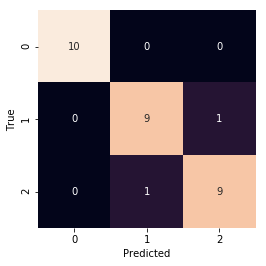

In [25]:
print('Confusion Matrix: ')
sns.heatmap(mat, square=True, annot = True,fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')

In [26]:
print(metrics.classification_report(y_test,y_pred))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.90      0.90      0.90        10
          2       0.90      0.90      0.90        10

avg / total       0.93      0.93      0.93        30

